In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Novartis Data Science Hackathon

## 1. Importing and inital analysis 

In [3]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
train = pd.read_csv('/content/gdrive/My Drive/Novartis/Train.csv',parse_dates=True)
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
test = pd.read_csv('/content/gdrive/My Drive/Novartis/Test.csv',parse_dates=True)
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15776 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


In [8]:
train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [9]:
100 * train.isnull().sum() / len(train)

INCIDENT_ID         0.000000
DATE                0.000000
X_1                 0.000000
X_2                 0.000000
X_3                 0.000000
X_4                 0.000000
X_5                 0.000000
X_6                 0.000000
X_7                 0.000000
X_8                 0.000000
X_9                 0.000000
X_10                0.000000
X_11                0.000000
X_12                0.762911
X_13                0.000000
X_14                0.000000
X_15                0.000000
MULTIPLE_OFFENSE    0.000000
dtype: float64

**It is only a 0.7% of Missing Values from overall dataset**

In [10]:
test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [11]:
100 * test.isnull().sum() / len(test)

INCIDENT_ID    0.000000
DATE           0.000000
X_1            0.000000
X_2            0.000000
X_3            0.000000
X_4            0.000000
X_5            0.000000
X_6            0.000000
X_7            0.000000
X_8            0.000000
X_9            0.000000
X_10           0.000000
X_11           0.000000
X_12           0.798591
X_13           0.000000
X_14           0.000000
X_15           0.000000
dtype: float64

In [12]:
train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [13]:
test.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
mean,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,50.000000,6.000000,40.000000,332.000000,40.000000,117.000000,142.000000,50.000000


## 2. Dealing with Missing values

### **a. Training dataset**

In [14]:
train.corr()['X_12'].sort_values()

MULTIPLE_OFFENSE   -0.113061
X_2                -0.067720
X_3                -0.064872
X_14               -0.042033
X_1                -0.034835
X_6                -0.031258
X_7                -0.000409
X_9                 0.005150
X_11                0.027363
X_13                0.030012
X_15                0.044005
X_4                 0.059135
X_5                 0.082068
X_8                 0.273107
X_10                0.877743
X_12                1.000000
Name: X_12, dtype: float64

### **Looks like X_12 feature correlates with X_10, We can see the same with below correlation matrix as well.** 

### **We will group the dataframe by the X_10 and calculate the mean value for the X_12 feature per X_10**

In [15]:
X_10_avg_train = train.groupby('X_10').mean()['X_12']

In [16]:
def fill_X_12(X_10, X_12):
    
    if np.isnan(X_12):
        return X_10_avg_train[X_10]
    else:
        return X_12

In [17]:
train['X_12'] = train.apply(lambda x: fill_X_12(x['X_10'], x['X_12']), axis=1)

In [18]:
train.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

### **b. Testing dataset**

In [19]:
X_10_avg_test = train.groupby('X_10').mean()['X_12']

In [20]:
def fill_X_12(X_10, X_12):
    
    if np.isnan(X_12):
        return X_10_avg_test[X_10]
    else:
        return X_12

In [21]:
test['X_12'] = test.apply(lambda x: fill_X_12(x['X_10'], x['X_12']), axis=1)

In [22]:
test.isnull().sum()

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

## 3. Exploratory Data Analysis

### Feature Selection

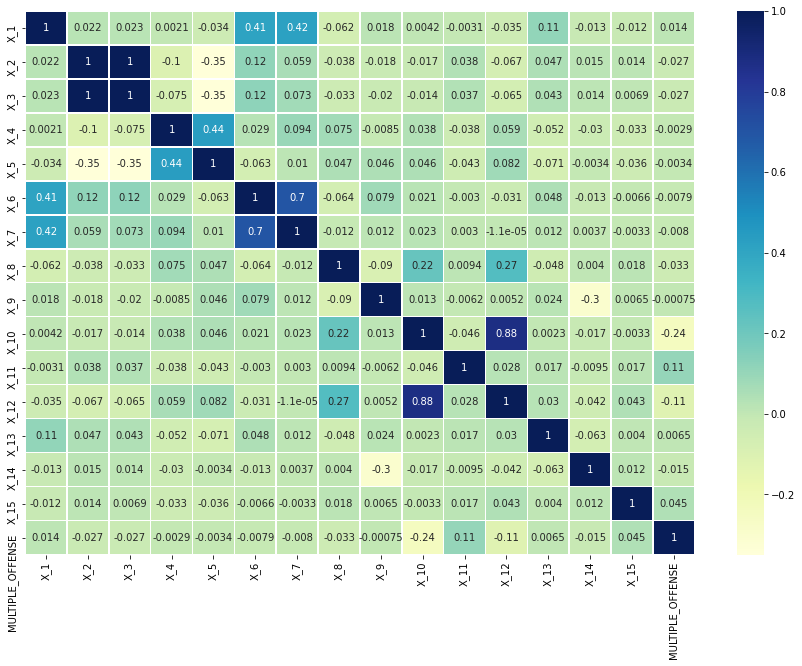

In [23]:
# Correlation Coefficient Matrix => Train Dataset

corr = train.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, cmap = 'YlGnBu', annot = True, linewidths = 0.5);

In [24]:
# Predictive Power Score (PPS)
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.3-py2.py3-none-any.whl size=10303 sha256=a239ad908406e5ddba7d4435e6dc34f79c472a495060753bc838a2187ca72474
  Stored in directory: /root/.cache/pip/wheels/28/ec/1a/09b55fade9bc078cde4327f2b2cfd81dcce2cda35dd91ed2e9
Successfully built ppscore


In [25]:
import ppscore as pps

In [ ]:
pps_m = pps.matrix(train)

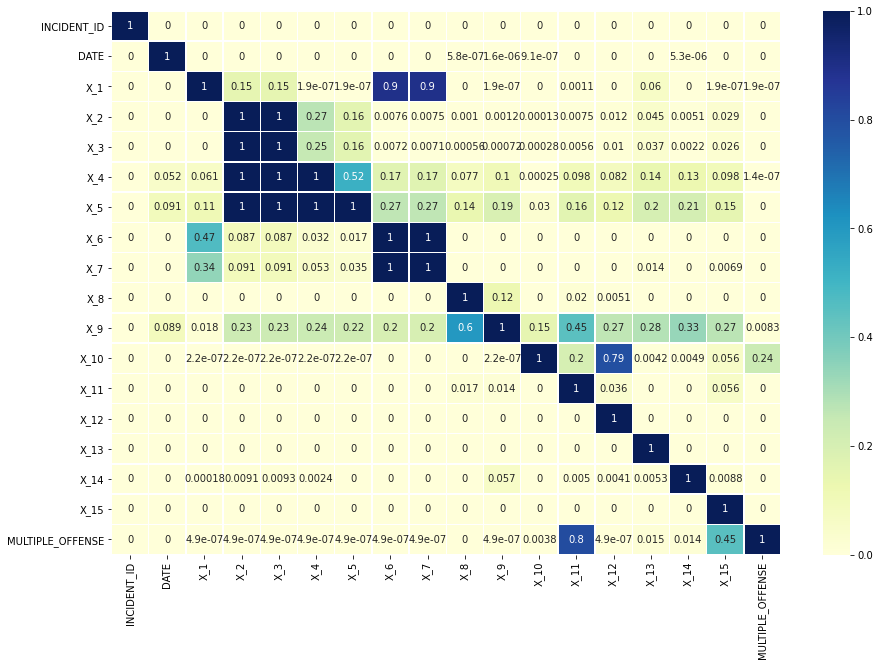

In [27]:
# PPS Matrix
plt.figure(figsize = (15,10))
sns.heatmap(pps_m, cmap = 'YlGnBu', annot = True, linewidths = 0.5);

### **From PPS matrix we can see that  hacking attempts have strong correlation with the activity of 'X_11' feature which is not that quite visible in  the pearson correlation coeffieint.** <br>
### **So does the X_6 vs X7; X_6 & X_7 with X_1, so does many variables.**

In [28]:
train.corr()['MULTIPLE_OFFENSE'].sort_values()

X_10               -0.242596
X_12               -0.113298
X_8                -0.033397
X_2                -0.027293
X_3                -0.027218
X_14               -0.015267
X_7                -0.008036
X_6                -0.007903
X_5                -0.003450
X_4                -0.002921
X_9                -0.000748
X_13                0.006512
X_1                 0.014034
X_15                0.044916
X_11                0.105088
MULTIPLE_OFFENSE    1.000000
Name: MULTIPLE_OFFENSE, dtype: float64

In [29]:
train.corr()['MULTIPLE_OFFENSE'][:-1].sort_values()

X_10   -0.242596
X_12   -0.113298
X_8    -0.033397
X_2    -0.027293
X_3    -0.027218
X_14   -0.015267
X_7    -0.008036
X_6    -0.007903
X_5    -0.003450
X_4    -0.002921
X_9    -0.000748
X_13    0.006512
X_1     0.014034
X_15    0.044916
X_11    0.105088
Name: MULTIPLE_OFFENSE, dtype: float64

**With respect to the correlation between the independent variables with target variable feature X_11 and X_15 have highly correlated.but mostly X_11 as seen from the PPS matrix as well as the below correlation plot.**

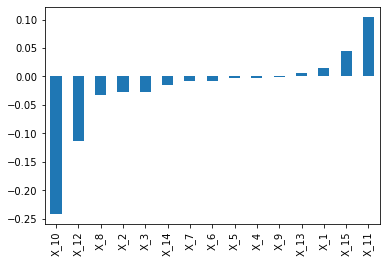

In [30]:
train.corr()['MULTIPLE_OFFENSE'][:-1].sort_values().plot(kind='bar');

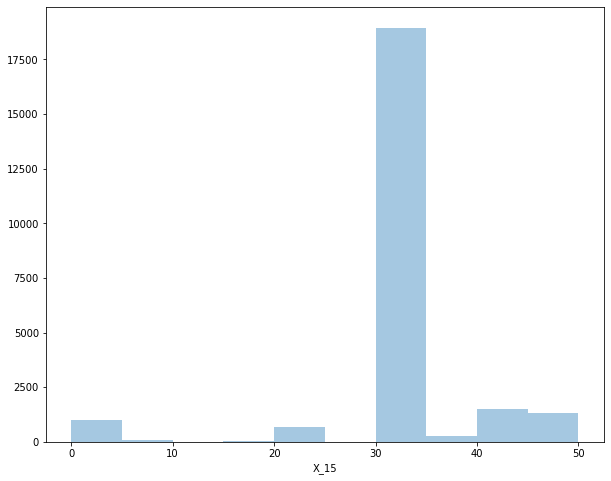

In [31]:
# Distribution plots of X_11 and X_15

plt.figure(figsize = (10,8))
sns.distplot(train['X_15'], bins = 10,  kde = False);

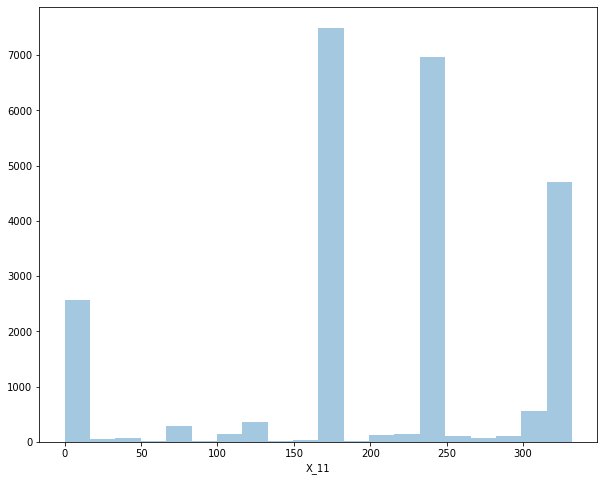

In [32]:
# Distribution plots of X_11 and X_15

plt.figure(figsize = (10,8))
sns.distplot(train['X_11'], bins = 20,  kde = False);

In [33]:
train['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

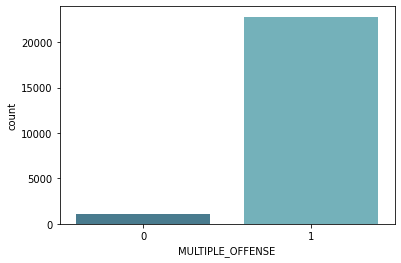

In [34]:
sns.countplot(x = 'MULTIPLE_OFFENSE', palette = 'GnBu_d', data = train);

### **There are more attempts of positive hacking occured as seen by the training dataset with very fewer ones - indicating very disproportionate distribution which is a very imbalenced data. Need to resolve this issue by oversampling or undersampling technique.**

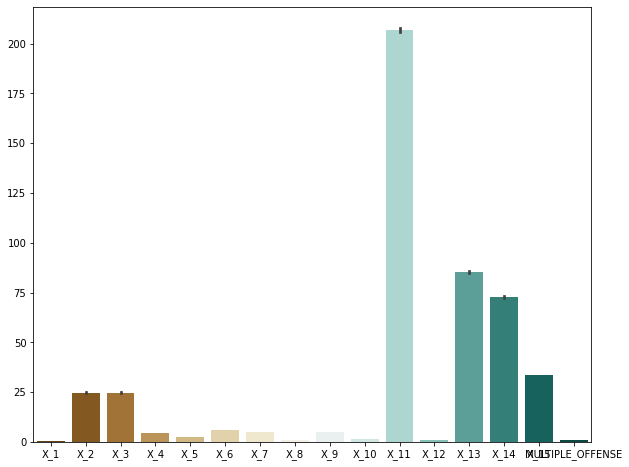

In [35]:
plt.figure(figsize = (10,8))
sns.barplot(palette = 'BrBG', data = train);

### **Feature X_11 has the most density with X_13, X_14, X_15, X_2 and X_3 following along, one very important observations from PPS matrix and barplot from above is X_11 has more predictive power followed by X_15, still X_13 and X_14 have more density than the X_15. which indicates that we need to concentrate only on X_11 and X_15.  - May have to scale the features.**

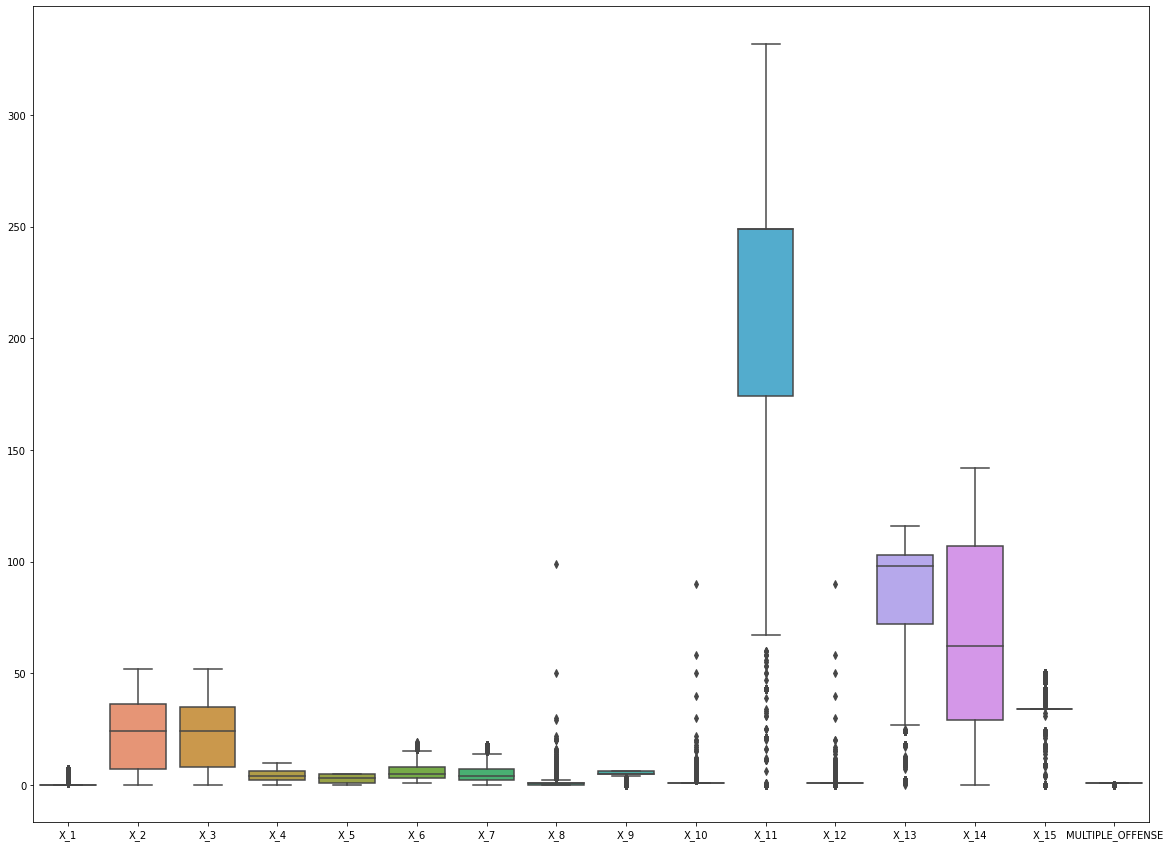

In [36]:
plt.figure(figsize = (20,15))
sns.boxplot(data = train);

### **In the Box plot there are more underliers than outliers with mostly uniform till X_10 and not so towards the end as seen from above plots.**

### Droping the id column

In [37]:
# drop columns array
drop_col_array = [  'INCIDENT_ID' ]
print(drop_col_array)

['INCIDENT_ID']


In [38]:
# drop INCIDENT_ID
train = train.drop(drop_col_array, axis=1)
test = test.drop(drop_col_array, axis=1)
print(train.shape, test.shape)

(23856, 17) (15903, 16)


### Converting Dates into datetime format


In [39]:
train['DATE'] = pd.to_datetime(train['DATE'])
test['DATE'] = pd.to_datetime(test['DATE'])

In [40]:
# Converting dates into individual types 

# Extracting Date features 
def extract_time_features(df):
    df['Date']=pd.to_datetime(df['DATE'])
    df['year'] = df['DATE'].dt.year
    df['month'] = df['DATE'].dt.month
    df['day_of_week'] = df['DATE'].dt.dayofweek
    df['Day'] = df['DATE'].dt.day
    df['DayOfyear'] = df['DATE'].dt.dayofyear
    df['Week'] = pd.to_datetime(df['DATE']).dt.week 
    df['Quarter'] = pd.to_datetime(df['DATE']).dt.quarter  
    # df['Is_month_start'] = pd.to_datetime(df['DATE']).dt.is_month_start 
    # df['Is_month_end'] = pd.to_datetime(df['DATE']).dt.is_month_end 
    del df['DATE']
    return df

In [41]:
train=extract_time_features(train)
test=extract_time_features(test)

In [42]:
print(train.shape)
print(test.shape)

(23856, 24)
(15903, 23)


In [43]:
train = train.drop(['Date'], axis =1)
test = test.drop(['Date'], axis =1)

# Feature engineeering & selection

In [44]:
# Splitting training dataset into train and test
X = train.copy().drop(['MULTIPLE_OFFENSE', 'X_4', 'X_5', 'X_9', 'X_13'], axis=1).values
y = train['MULTIPLE_OFFENSE']

In [45]:
test = test.copy().drop(['X_4', 'X_5', 'X_9', 'X_13'], axis=1).values

In [46]:
print(train.shape)
print(X.shape)
print(y.shape)

(23856, 23)
(23856, 18)
(23856,)


## Model Building

In [47]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

**SMOTE**

In [48]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state = 10)
smote_train, smote_train_target = oversampler.fit_sample(X_train,y_train)
smote_test,smote_test_target = oversampler.fit_sample(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [49]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(smote_train)
X_test = sc.transform(smote_test)
X_whole = sc.transform(X.copy())
test_v = sc.transform(test)

### Adaboost Model

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# n_estimators=500, random_state=10, learning_rate=0.9
ada = AdaBoostClassifier()
ada_fit = ada.fit(smote_train, smote_train_target)

**Predictions**

In [51]:
y_ada_pred_test = ada_fit.predict(smote_test)
y_ada_pred_train = ada_fit.predict(smote_train)

**Train and Test Recall Score**

In [52]:
print(metrics.recall_score(smote_test_target, y_ada_pred_test))#test accuracy
print(metrics.recall_score(smote_train_target, y_ada_pred_train))#train accuracy

0.9942982456140351
0.9951722624533684


## **The above model is the base model, with that I got lesser recall_score, hence I did the Random Optimization for fine tuning the parameters.**

### Random Search

In [54]:
# Importing GridSearch and RandomSearch

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold

In [53]:
# Different parameters we want to test

params = {'learning_rate' : [0.8, 0.9, 1, 1.2, 1.4],
          'n_estimators' : [400, 500, 600, 700]}

In [55]:
ada = AdaBoostClassifier(random_state=10)

In [57]:
folds = 20
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1231)

random_search = RandomizedSearchCV(ada, param_distributions=params, n_iter=param_comb, scoring='recall', n_jobs=4, cv=skf.split(X_train, smote_train_target), verbose=3, random_state=1231 )

# Here we go

random_search.fit(X_train, smote_train_target)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 46.0min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 82.8min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f5510637048>,
                   error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=10),
                   iid='deprecated', n_iter=10, n_jobs=4,
                   param_distributions={'learning_rate': [0.8, 0.9, 1, 1.2,
                                                          1.4],
                                        'n_estimators': [400, 500, 600, 700]},
                   pre_dispatch='2*n_jobs', random_state=1231, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=3)

In [58]:
random_search.best_score_

0.9998628333051333

In [59]:
random_search.best_params_

{'learning_rate': 1.4, 'n_estimators': 500}

In [60]:
random_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.4,
                   n_estimators=500, random_state=10)

In [61]:
ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.4,
                   n_estimators=500, random_state=1110) # 400 default old one 

ada_fit = ada.fit(X_train, smote_train_target)

In [62]:
y_ada_pred_test = ada_fit.predict(X_test)
y_ada_pred_train = ada_fit.predict(X_train)

In [63]:
print(metrics.recall_score(smote_test_target, y_ada_pred_test))#test accuracy
print(metrics.recall_score(smote_train_target, y_ada_pred_train))#train accuracy

0.999561403508772
1.0


In [64]:
test_pred = ada.predict(test_v)

In [65]:
print(test_pred.shape)
test_pred[:10]

(15903,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
# print number of 1s and 0s in predicted values

unique, counts = np.unique(test_pred, return_counts=True)
dict(zip(unique, counts))

{0: 732, 1: 15171}

In [67]:
# load INCIDENT_ID of test dataset
test_INCIDENT_ID = pd.read_csv('/content/gdrive/My Drive/Novartis/Test.csv')['INCIDENT_ID']
print(test_INCIDENT_ID.shape)

(15903,)


In [68]:
# save results to csv
subm = pd.DataFrame({'INCIDENT_ID': test_INCIDENT_ID, 'MULTIPLE_OFFENSE': test_pred})
subm = subm[['INCIDENT_ID','MULTIPLE_OFFENSE']]

In [69]:
filename='/content/gdrive/My Drive/Novartis/Adaboost-WS_final4.csv'
subm.to_csv(filename, index=False)